In [1]:
# ws01
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cols = ['preg', 'plas', 'pres', 'skin', 'insu', 'bmi', 'pedi', 'age', 'class']
df = pd.read_csv("data/pima-indians-diabetes.csv", names=cols)

In [2]:
df.head()

,preg,plas,pres,skin,insu,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
bmi      0
pedi     0
age      0
class    0
dtype: int64

In [4]:
df.describe().round(2)

,preg,plas,pres,skin,insu,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


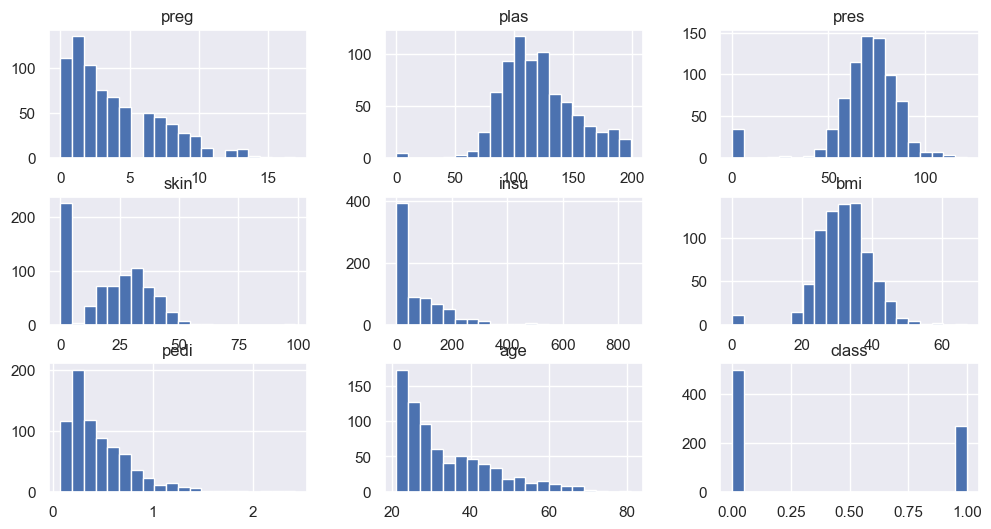

In [5]:
df.hist(bins=20, figsize=(12, 6))
plt.show()

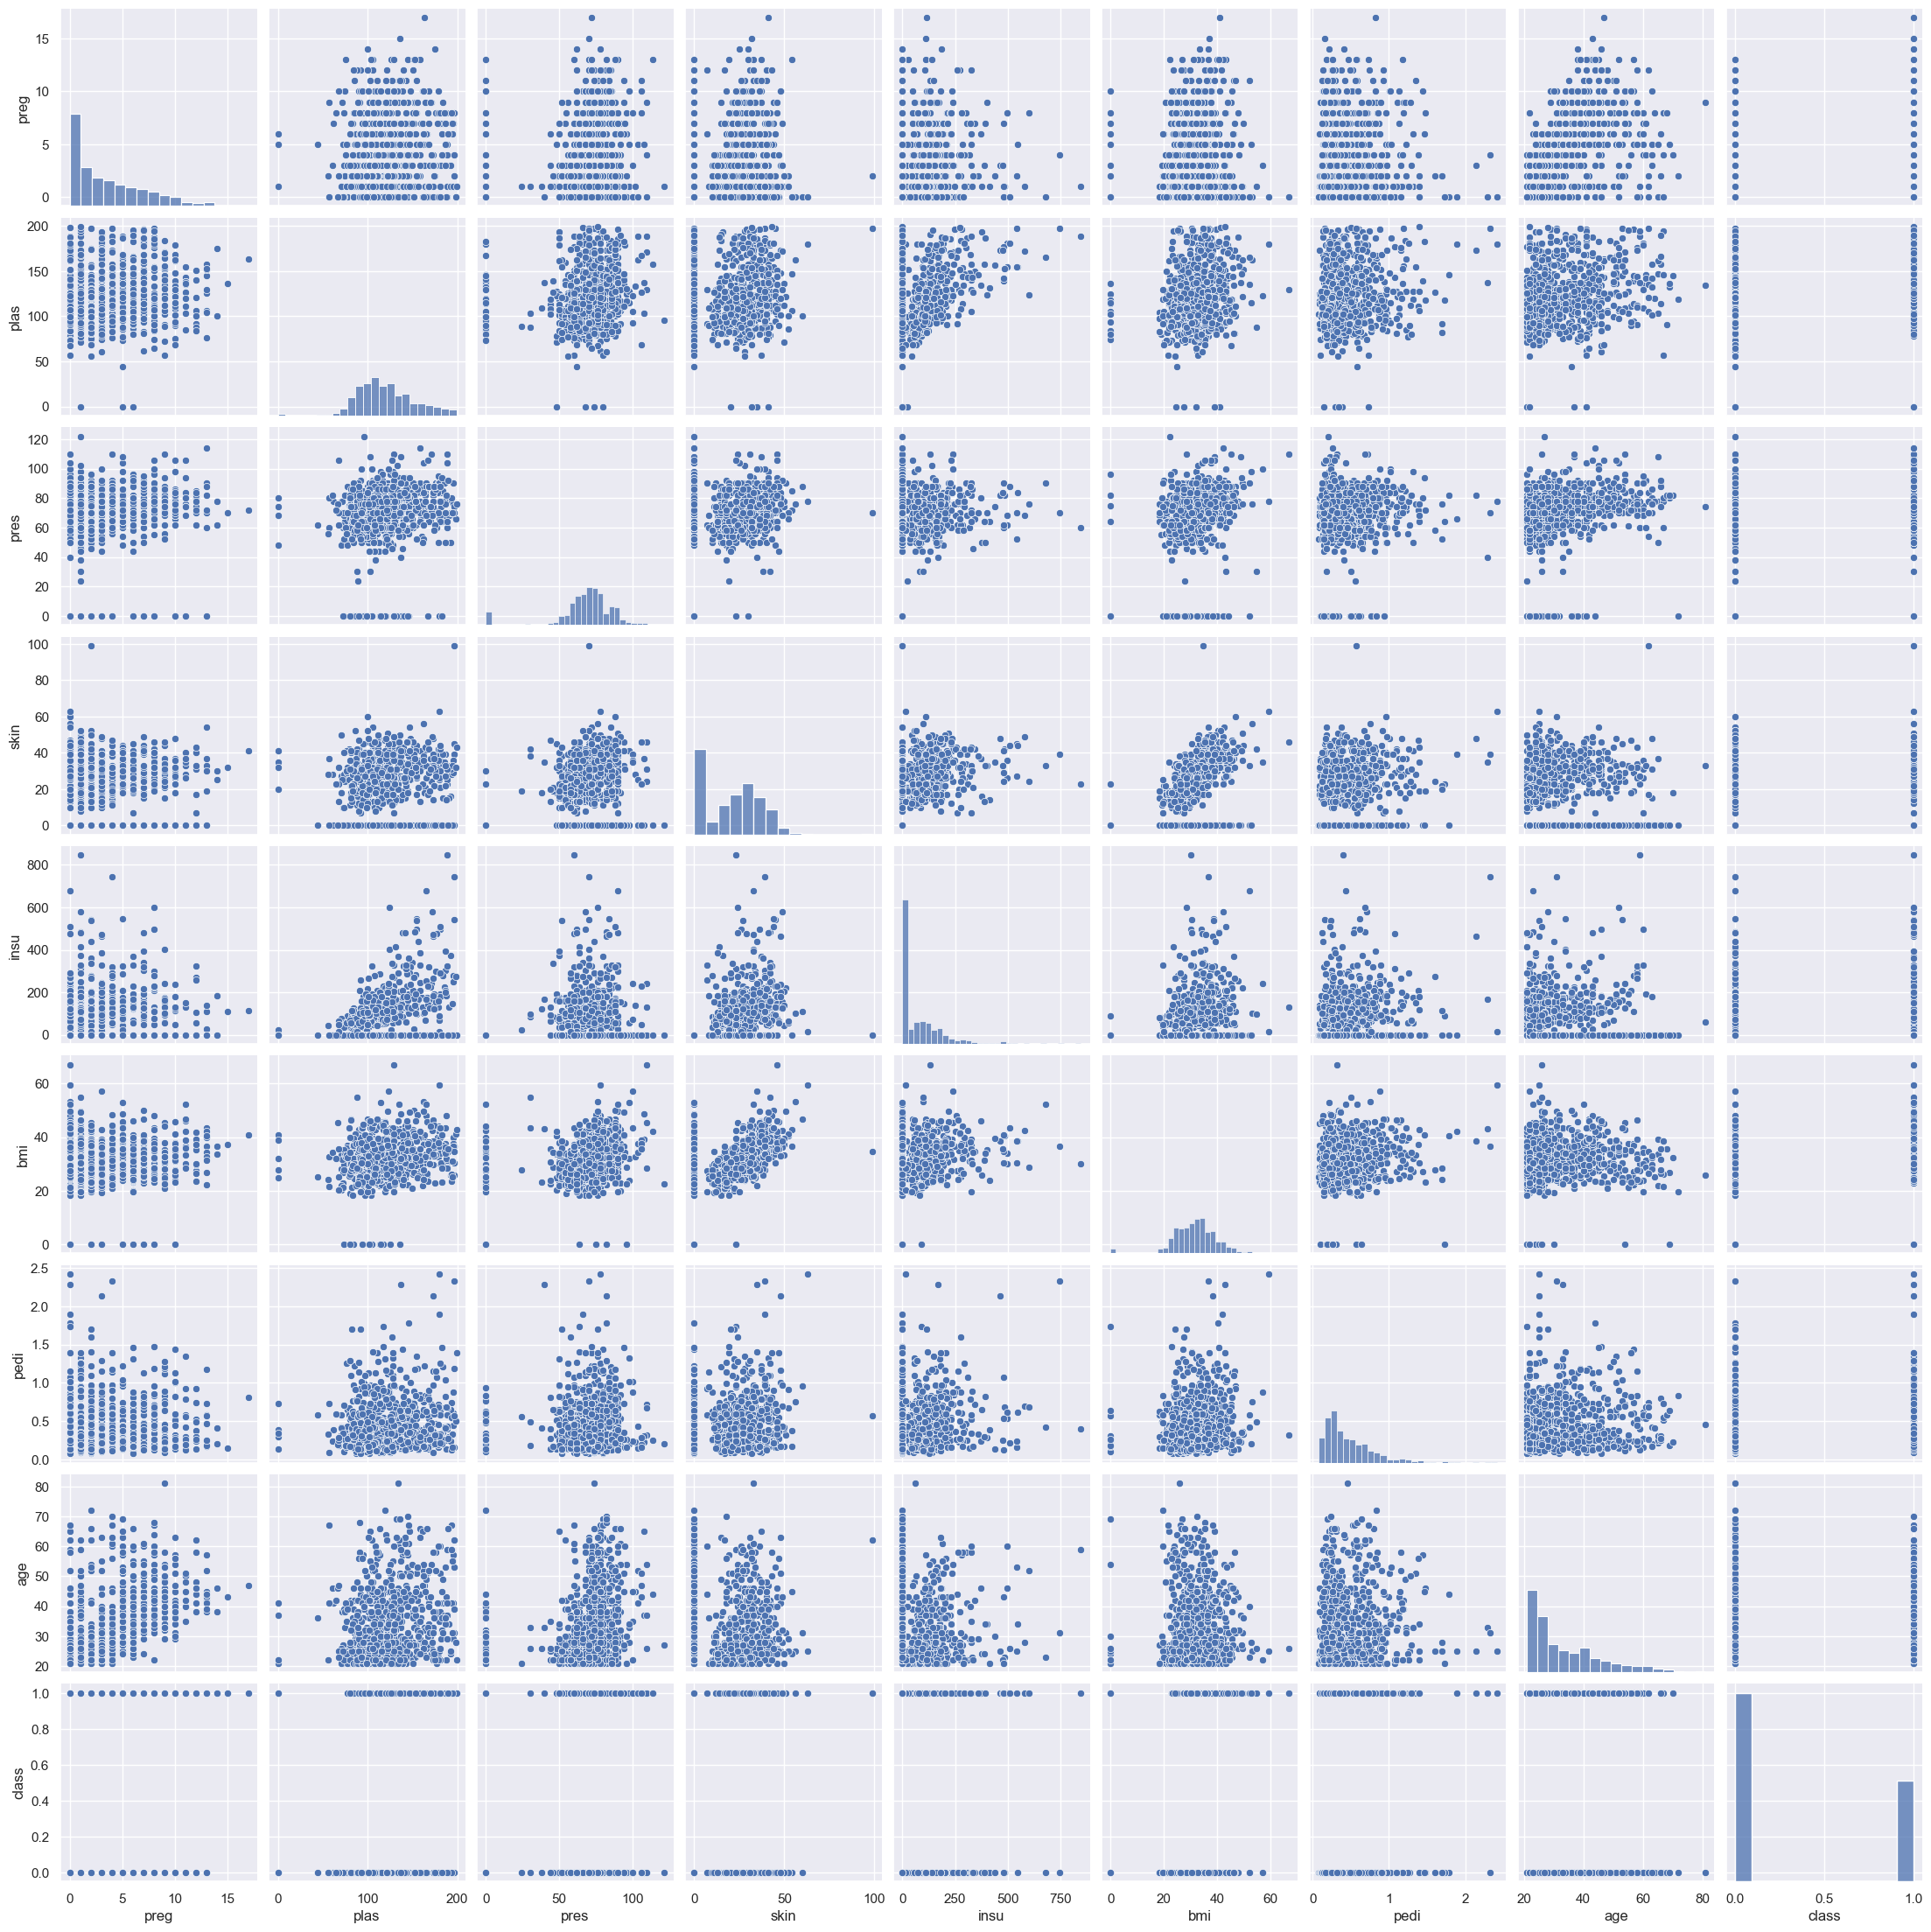

In [6]:
sns.pairplot(df)
plt.show()

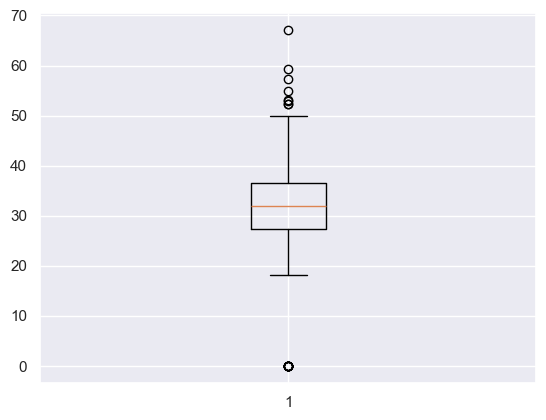

In [7]:
plt.boxplot(df.bmi)
plt.show()

In [8]:
df[df.bmi == 0] 

,preg,plas,pres,skin,insu,bmi,pedi,age,class
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [9]:
bmi_zero = df.bmi[df.bmi == 0].count() 
print('bmi zero = {} ' .format(bmi_zero))
print('{:.2f} %' .format(bmi_zero / df.shape[0] * 100))

bmi zero = 11 
1.43 %


In [10]:
def chk_zero(cl):
    zero = df[cl][df[cl] == 0].count() 
    print('{:5} {:5} {:7.2f} %' .format(cl, zero, zero/df.shape[0]*100))

print('Zero count: \n--------------------')
for col in df.columns:
    chk_zero(col) 

Zero count: 
--------------------
preg    111   14.45 %
plas      5    0.65 %
pres     35    4.56 %
skin    227   29.56 %
insu    374   48.70 %
bmi      11    1.43 %
pedi      0    0.00 %
age       0    0.00 %
class   500   65.10 %


In [11]:
df['bmi'] = df.bmi.replace(0, df.bmi.mean())
# df['insu'] = df.insu.replace(0, 131) 
# df = df[df.bmi > 0]
# df = df[df.plas > 0]
# df = df[df.skin > 0]
# df = df[df.test > 0]
# df = df[(df.bmi > 0) & (df.plas > 0) & (df.skin > 0) & (df.insu > 0)]

In [12]:
df.drop('insu', axis=1, inplace=True)

In [13]:
df.describe().round(2)

,preg,plas,pres,skin,bmi,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,32.45,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,6.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,18.20,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,67.10,2.42,81.00,1.00


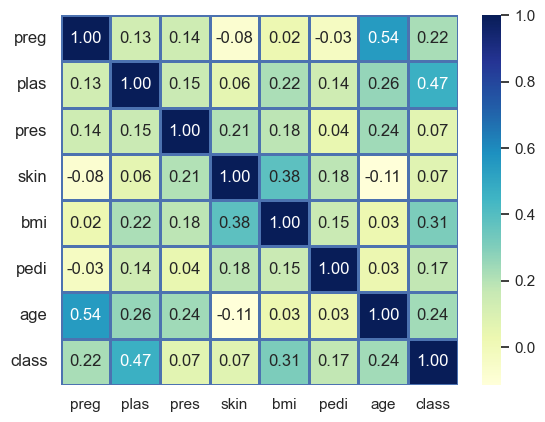

In [14]:

cor = df.corr()


g = sns.heatmap(cor, annot=True, cmap='YlGnBu', linewidths=0.8, 
                linecolor='b', fmt='.2f') 

g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

In [15]:

cols_fts = ['preg','plas','bmi','pedi','age'] 

In [16]:
X = df[cols_fts].copy()
X['test'] = df['age'] * .7 - df['pedi'] * 9
X.head()


,preg,plas,bmi,pedi,age,test
0,6,148,33.6,0.627,50,29.357
1,1,85,26.6,0.351,31,18.541
2,8,183,23.3,0.672,32,16.352
3,1,89,28.1,0.167,21,13.197
4,0,137,43.1,2.288,33,2.508


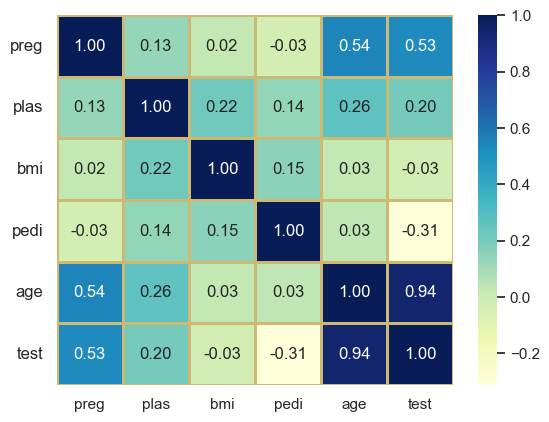

In [17]:

corr = X.corr()

g = sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.8, 
                linecolor='y', fmt='.2f') 

g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

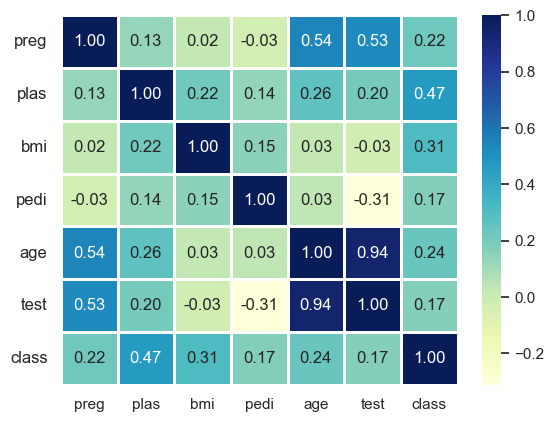

In [18]:

X2 = X.copy()
X2['class'] = df['class']
corr = X2.corr()


g = sns.heatmap(corr, annot=True, cmap='YlGnBu', linewidths=0.8, 
                linecolor='w', fmt='.2f') 

g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=12)
plt.show()

### ws02

In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler

X = df.drop('class', axis=1)

sc = Scaler() 
X_sc = sc.fit_transform(X)

df_sc = pd.DataFrame(X_sc, columns=X.columns)
df_sc.head().round(3)

,preg,plas,pres,skin,bmi,pedi,age
0,0.353,0.744,0.590,0.354,0.315,0.234,0.483
1,0.059,0.427,0.541,0.293,0.172,0.117,0.167
2,0.471,0.920,0.525,0.000,0.104,0.254,0.183
3,0.059,0.447,0.541,0.232,0.202,0.038,0.000
4,0.000,0.688,0.328,0.354,0.509,0.944,0.200


In [20]:
# variance
df_sc.var().sort_values(ascending=False).round(5) * 1000

preg    39.29
age     38.42
skin    25.96
plas    25.81
pres    25.17
pedi    20.01
bmi     19.77
dtype: float64

### ws03

In [21]:
df["class"] = df["class"].astype('category')
y = df['class']

In [22]:
X = df.drop(['class'], axis=1)
X.head(3)

,preg,plas,pres,skin,bmi,pedi,age
0,6,148,72,35,33.6,0.627,50
1,1,85,66,29,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32


In [23]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler

sc = Scaler() # scaler.fit(X)
X_sc = sc.fit_transform(X)
df_sc = pd.DataFrame(X_sc, columns=X.columns)

In [24]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X_sc, y)

np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X_sc)

print(features[0:3,:])

[6.56  7.095 0.144 0.536 5.073 2.759 8.206]
[[0.353 0.744 0.315 0.234 0.483]
 [0.059 0.427 0.172 0.117 0.167]
 [0.471 0.92  0.104 0.254 0.183]]


In [25]:
dfts = pd.DataFrame(fit.scores_ , columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by='score', ascending=False)

,score,column
6,8.205691,age
1,7.094910,plas
0,6.559982,preg
4,5.072897,bmi
5,2.758584,pedi
3,0.536445,skin
2,0.144306,pres


In [26]:
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column
cols_fts.values

array(['age', 'plas', 'preg', 'bmi', 'pedi'], dtype=object)

In [27]:
cols_fts = dfts.nlargest(5, 'score').column
cols_fts.values

array(['age', 'plas', 'preg', 'bmi', 'pedi'], dtype=object)

In [28]:
X_fts = df_sc[cols_fts].copy()
X_fts.shape
X_fts.head()

,age,plas,preg,bmi,pedi
0,0.483333,0.743719,0.352941,0.314928,0.234415
1,0.166667,0.427136,0.058824,0.171779,0.116567
2,0.183333,0.919598,0.470588,0.104294,0.253629
3,0.000000,0.447236,0.058824,0.202454,0.038002
4,0.200000,0.688442,0.000000,0.509202,0.943638


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear') # , probability=True) 76.7

cvs = cross_val_score(model, X_fts, y, cv=10)  # no need to use model.fit  
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.75 0.79 0.77 0.73 0.75 0.81 0.78 0.79 0.72 0.83]
Average (%) = 77.21


### ws04

In [36]:

from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC()

rfe = RFE(estimator=model, n_features_to_select=5) 
rfe = rfe.fit(X_sc, y)

print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True False]
[1 1 1 3 1 1 2]


In [37]:
cols_fts = []
for i,cl in enumerate(X.columns):  
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts

['preg', 'plas', 'pres', 'bmi', 'pedi']

In [38]:
X_fts = df_sc[cols_fts]
X_fts.shape
X_fts.head()

,preg,plas,pres,bmi,pedi
0,0.352941,0.743719,0.590164,0.314928,0.234415
1,0.058824,0.427136,0.540984,0.171779,0.116567
2,0.470588,0.919598,0.524590,0.104294,0.253629
3,0.058824,0.447236,0.540984,0.202454,0.038002
4,0.000000,0.688442,0.327869,0.509202,0.943638
